# Лабораторная работа: Анализ данных, очистка, генерация признаков и масштабирование

Этот ноутбук воспроизводит шаги из проекта:
- Загрузка датасета
- Анализ пропусков (визуализация тепловой карты и диаграммы)
- Поиск аномалий (BoxPlot по числовым признакам)
- Заполнение пропусков и повторная проверка
- Обработка выбросов и повторная проверка
- Генерация новых признаков
- Кодирование категориальных признаков (OHE, бинаризация)
- Стандартизация (Z-score) и нормализация (Min-Max)


In [11]:
# Импорт и настройка
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import helpers
helpers.setup()


In [12]:
# Загрузка данных
path = './train.csv'
df = helpers.load_data(path)
df.head()


Загрузка данных из ./train.csv
Данные успешно загружены. Форма: (550068, 12)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969



ВИЗУАЛИЗАЦИЯ ПРОПУСКОВ


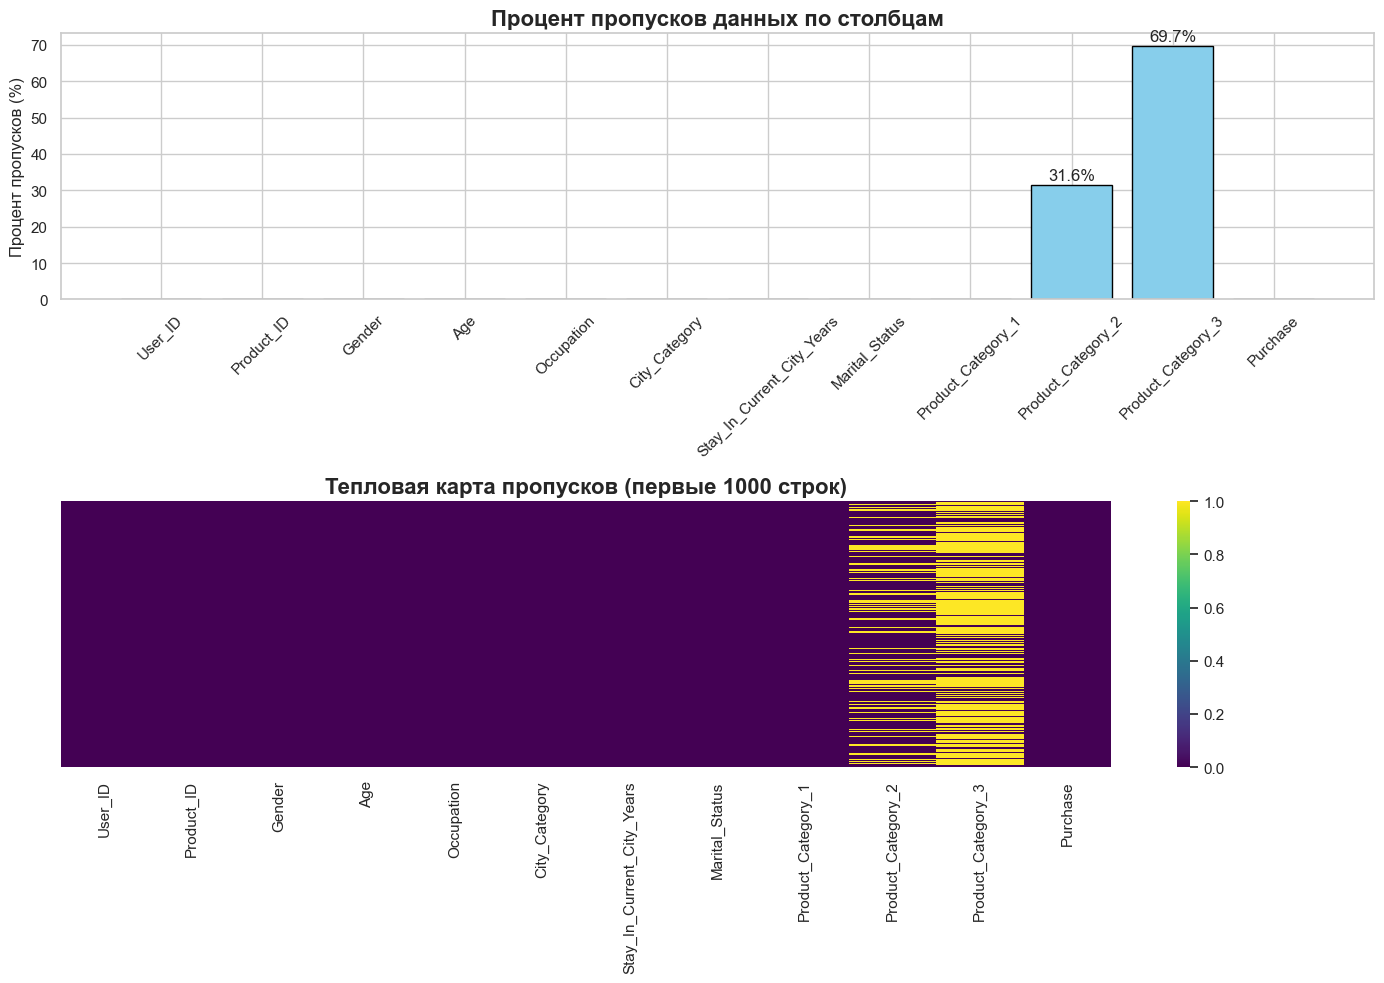

Product_Category_3    383247
Product_Category_2    173638
dtype: int64

In [13]:
# Анализ пропусков: графики и таблицы
helpers.analyze_misses(df)

missing = df.isnull().sum().sort_values(ascending=False)
missing[missing > 0].head(20)


Анализируемые числовые столбцы: ['Purchase', 'Occupation', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']

ДЕТАЛЬНЫЙ АНАЛИЗ ВЫБРОСОВ ПО ВСЕМ СТОЛБЦАМ


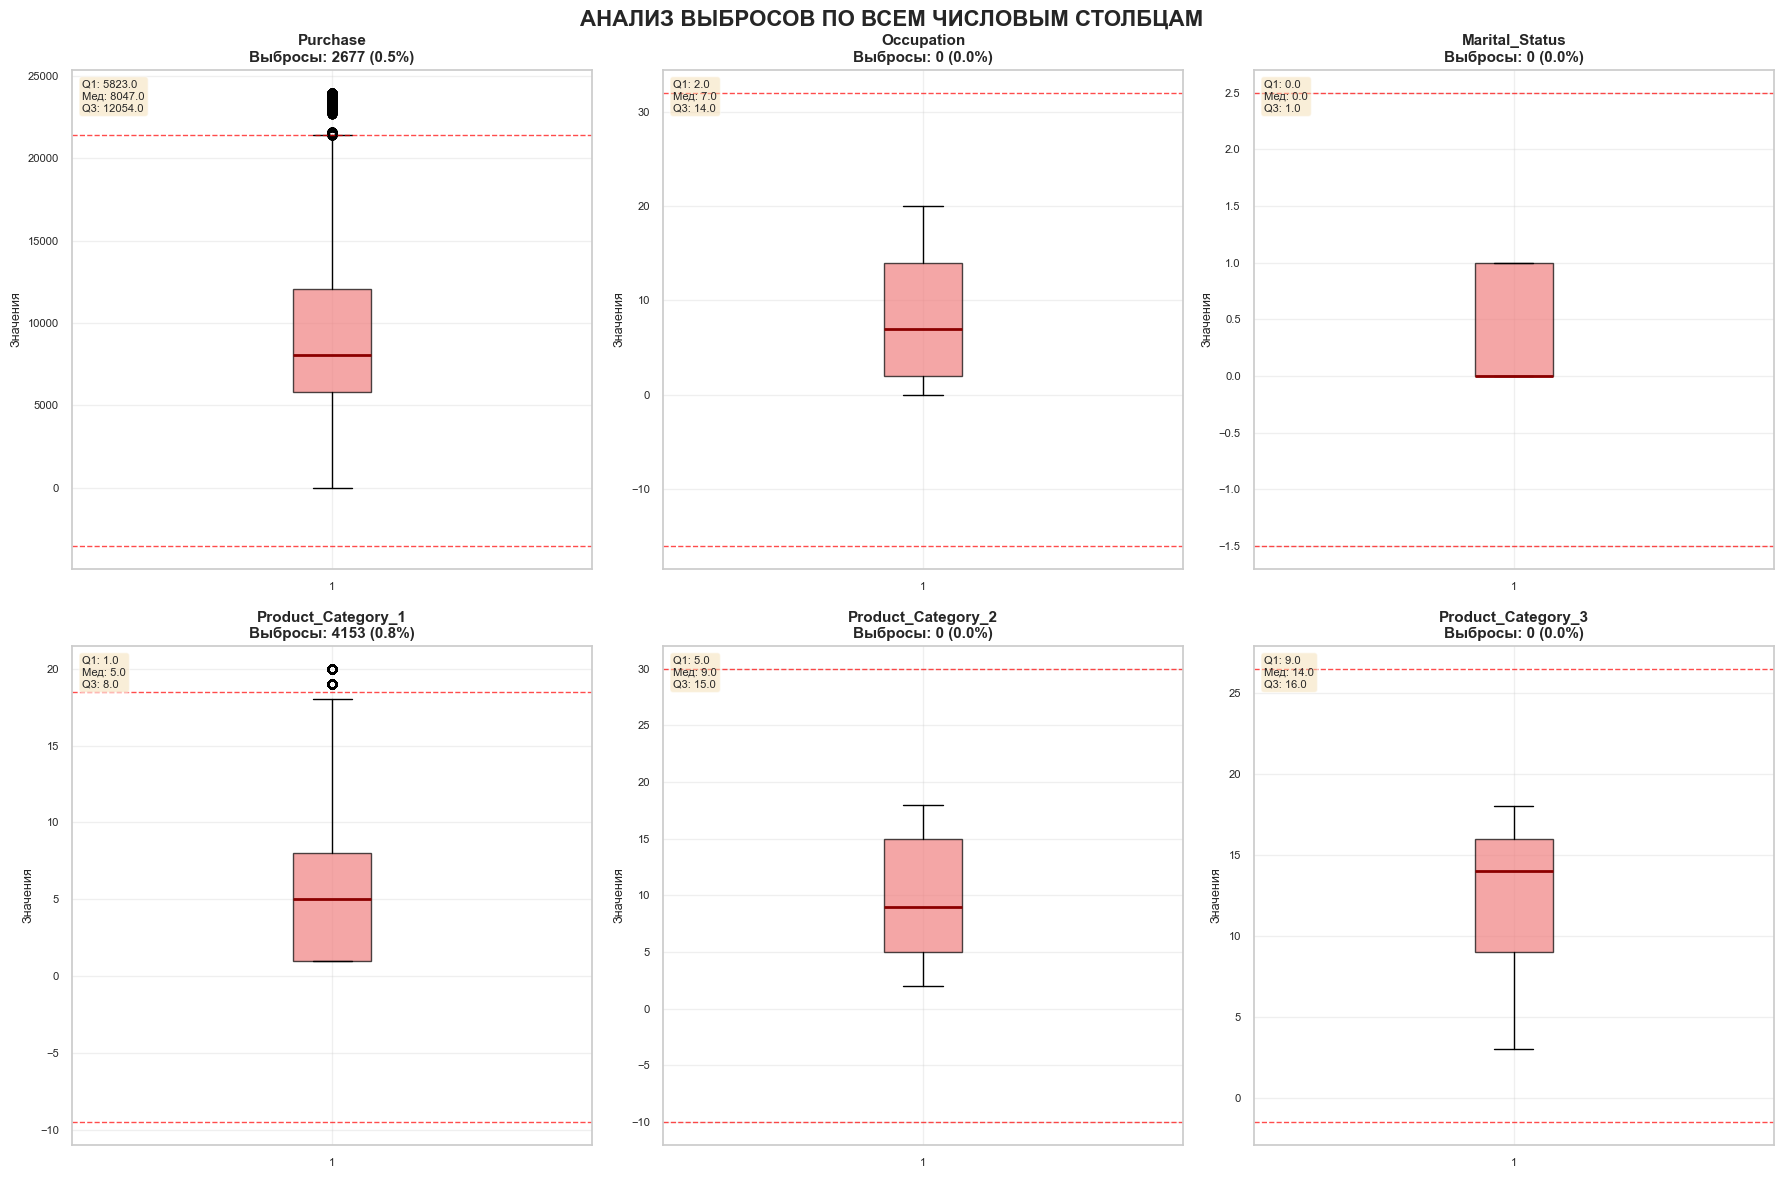


--------------------------------------------------------------------------------
СВОДНАЯ СТАТИСТИКА ВЫБРОСОВ
--------------------------------------------------------------------------------
           Колонка     Q1  Медиана      Q3    IQR  Выбросы  % Выбросов            Границы
Product_Category_1    1.0      5.0     8.0    7.0     4153        0.75       [-9.5, 18.5]
          Purchase 5823.0   8047.0 12054.0 6231.0     2677        0.49 [-3523.5, 21400.5]
        Occupation    2.0      7.0    14.0   12.0        0        0.00      [-16.0, 32.0]
    Marital_Status    0.0      0.0     1.0    1.0        0        0.00        [-1.5, 2.5]
Product_Category_2    5.0      9.0    15.0   10.0        0        0.00      [-10.0, 30.0]
Product_Category_3    9.0     14.0    16.0    7.0        0        0.00       [-1.5, 26.5]

--------------------------------------------------------------------------------
ДЕТАЛЬНЫЙ АНАЛИЗ ПО КОЛОНКАМ
--------------------------------------------------------------------

In [14]:
# Поиск аномалий (выбросов)
helpers.anomaly_find(df)



ВИЗУАЛИЗАЦИЯ ПРОПУСКОВ


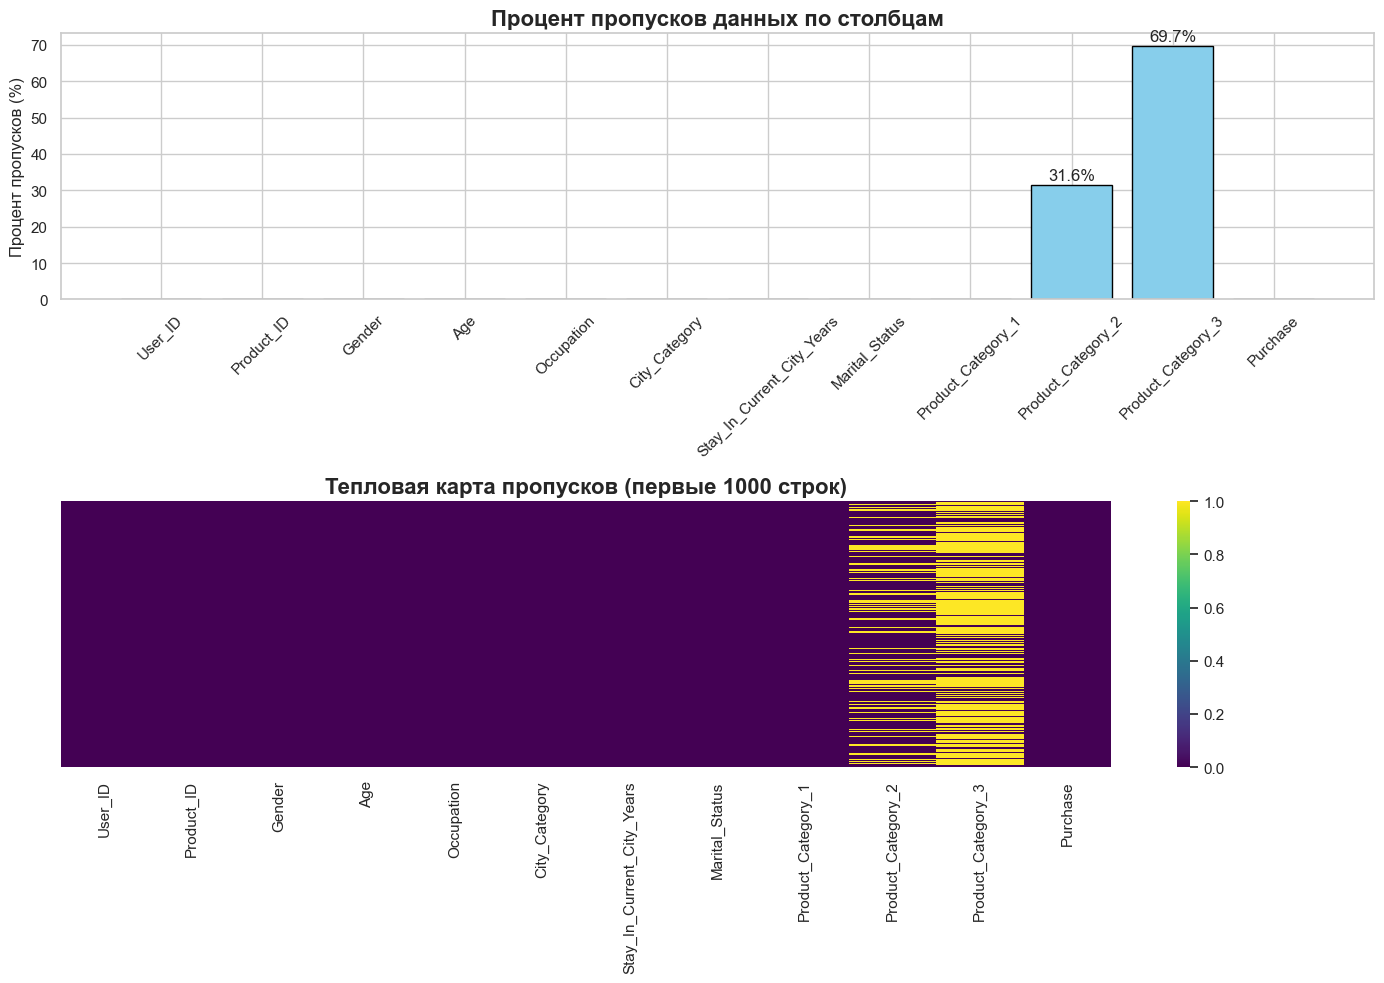

ЗАПОЛНЕНИЕ ПРОПУСКОВ В ДАННЫХ

Пропуски до заполнения:
   Product_Category_2: 173638 (31.6%)
   Product_Category_3: 383247 (69.7%)
   Product_Category_2 → заполнено методом mode, значение 8.0
   Product_Category_3 → заполнено методом mode, значение 16.0

ВИЗУАЛИЗАЦИЯ ПРОПУСКОВ


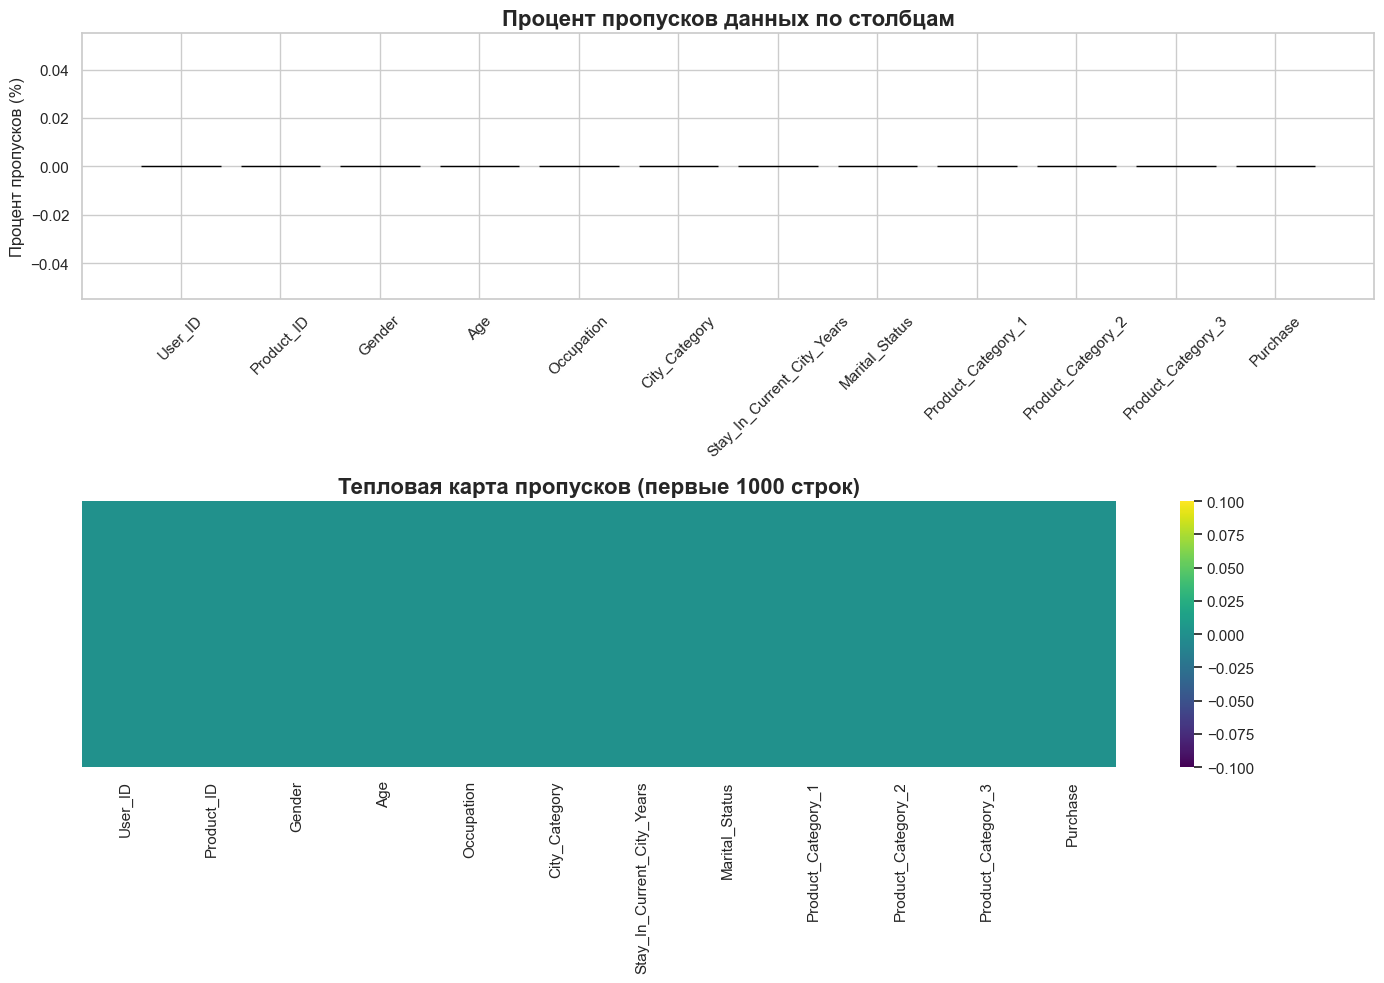

In [15]:
# Заполнение пропусков и повторная проверка
helpers.analyze_misses(df)
df_filled = helpers.fill_missing_value_mode(df)
helpers.analyze_misses(df_filled)


Анализируемые числовые столбцы: ['Purchase', 'Occupation', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']

ДЕТАЛЬНЫЙ АНАЛИЗ ВЫБРОСОВ ПО ВСЕМ СТОЛБЦАМ


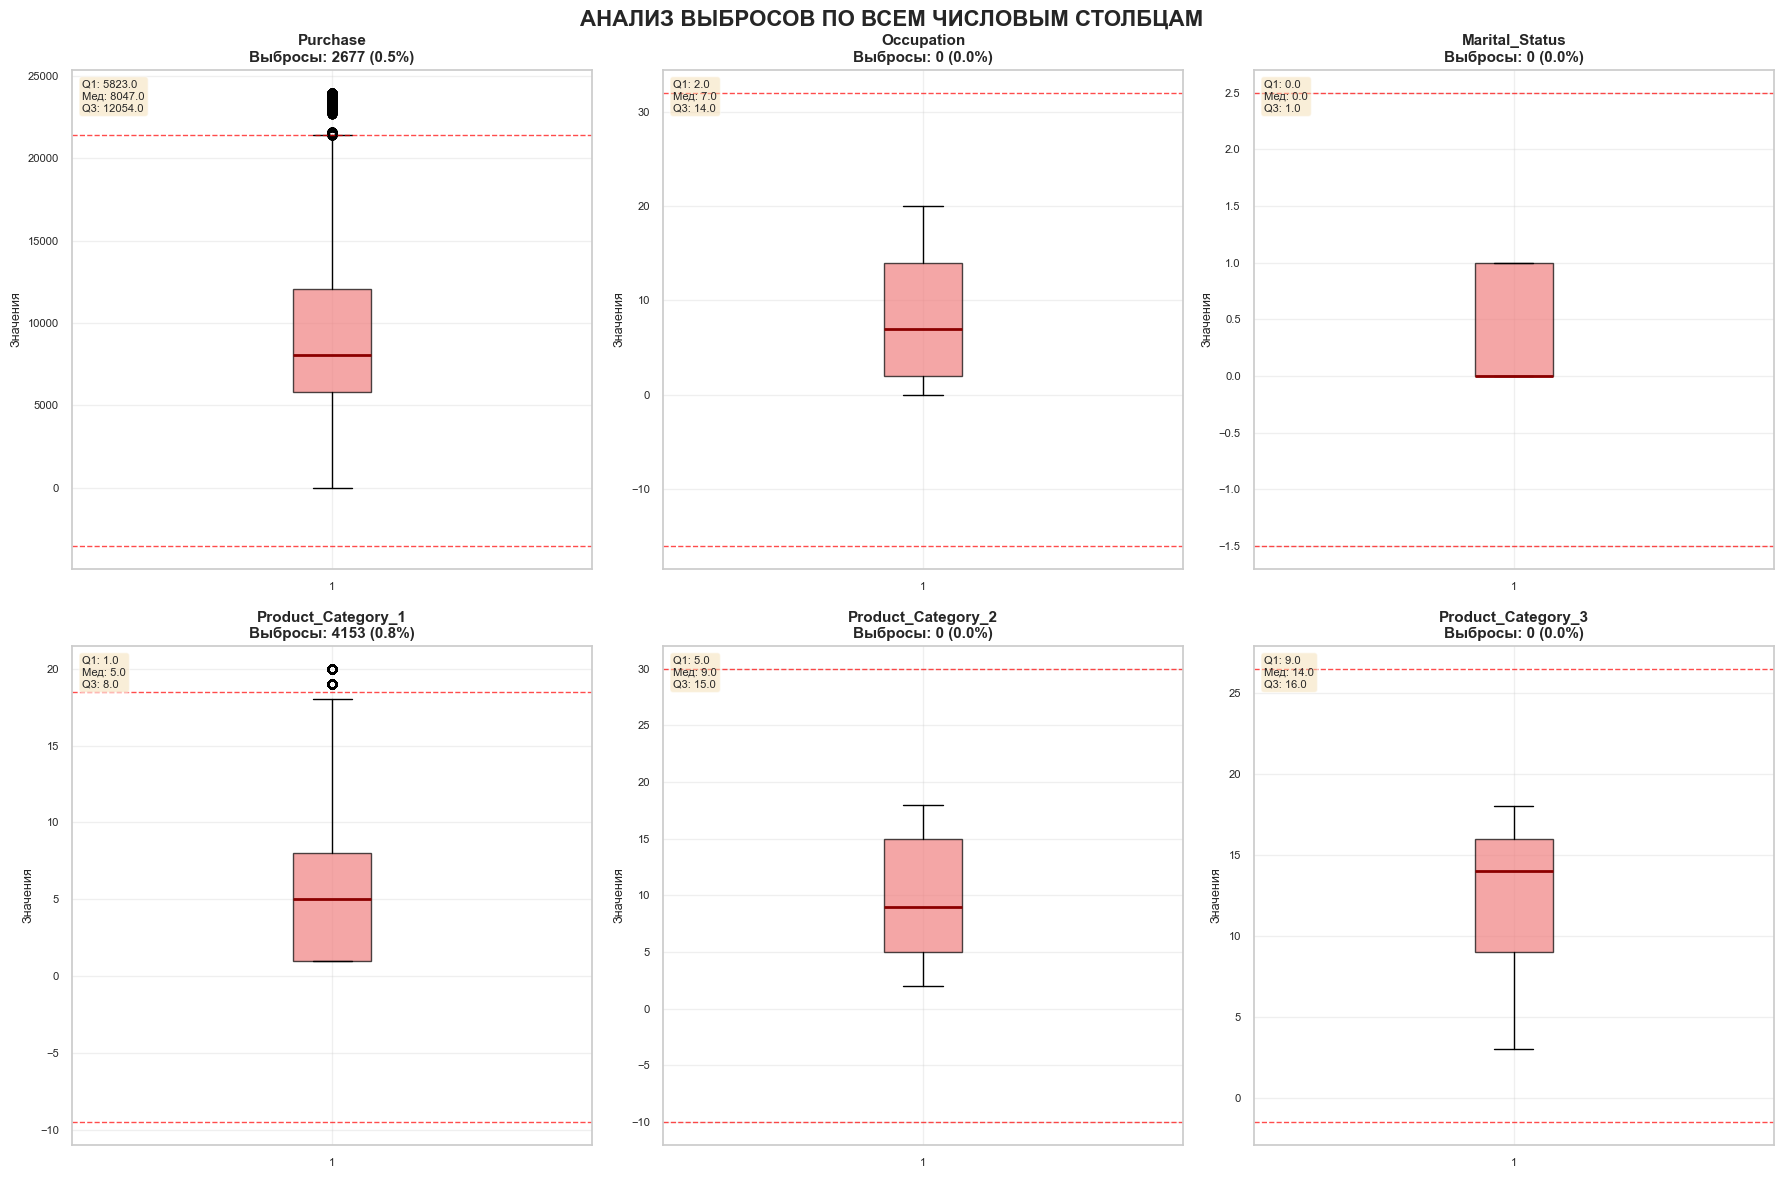


--------------------------------------------------------------------------------
СВОДНАЯ СТАТИСТИКА ВЫБРОСОВ
--------------------------------------------------------------------------------
           Колонка     Q1  Медиана      Q3    IQR  Выбросы  % Выбросов            Границы
Product_Category_1    1.0      5.0     8.0    7.0     4153        0.75       [-9.5, 18.5]
          Purchase 5823.0   8047.0 12054.0 6231.0     2677        0.49 [-3523.5, 21400.5]
        Occupation    2.0      7.0    14.0   12.0        0        0.00      [-16.0, 32.0]
    Marital_Status    0.0      0.0     1.0    1.0        0        0.00        [-1.5, 2.5]
Product_Category_2    5.0      9.0    15.0   10.0        0        0.00      [-10.0, 30.0]
Product_Category_3    9.0     14.0    16.0    7.0        0        0.00       [-1.5, 26.5]

--------------------------------------------------------------------------------
ДЕТАЛЬНЫЙ АНАЛИЗ ПО КОЛОНКАМ
--------------------------------------------------------------------

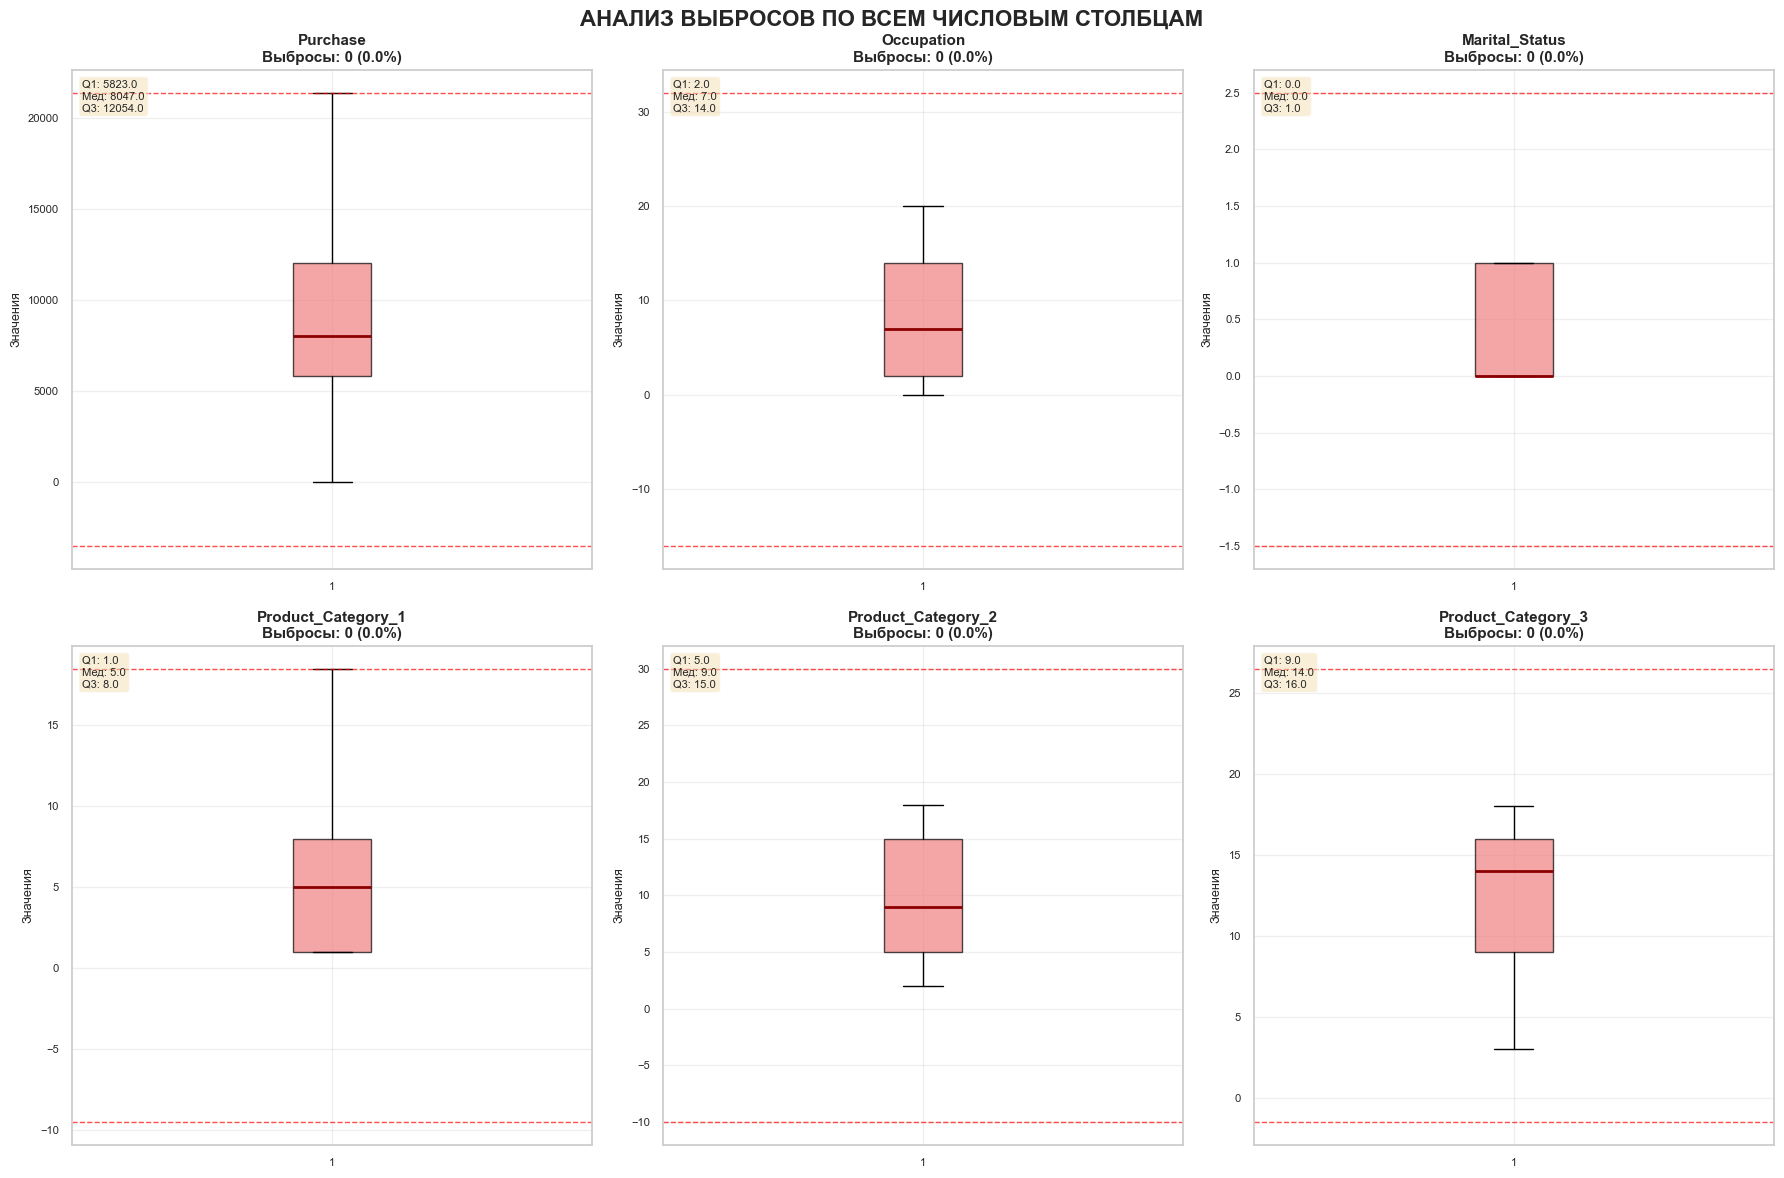


--------------------------------------------------------------------------------
СВОДНАЯ СТАТИСТИКА ВЫБРОСОВ
--------------------------------------------------------------------------------
           Колонка     Q1  Медиана      Q3    IQR  Выбросы  % Выбросов            Границы
          Purchase 5823.0   8047.0 12054.0 6231.0        0         0.0 [-3523.5, 21400.5]
        Occupation    2.0      7.0    14.0   12.0        0         0.0      [-16.0, 32.0]
    Marital_Status    0.0      0.0     1.0    1.0        0         0.0        [-1.5, 2.5]
Product_Category_1    1.0      5.0     8.0    7.0        0         0.0       [-9.5, 18.5]
Product_Category_2    5.0      9.0    15.0   10.0        0         0.0      [-10.0, 30.0]
Product_Category_3    9.0     14.0    16.0    7.0        0         0.0       [-1.5, 26.5]

--------------------------------------------------------------------------------
ДЕТАЛЬНЫЙ АНАЛИЗ ПО КОЛОНКАМ
--------------------------------------------------------------------

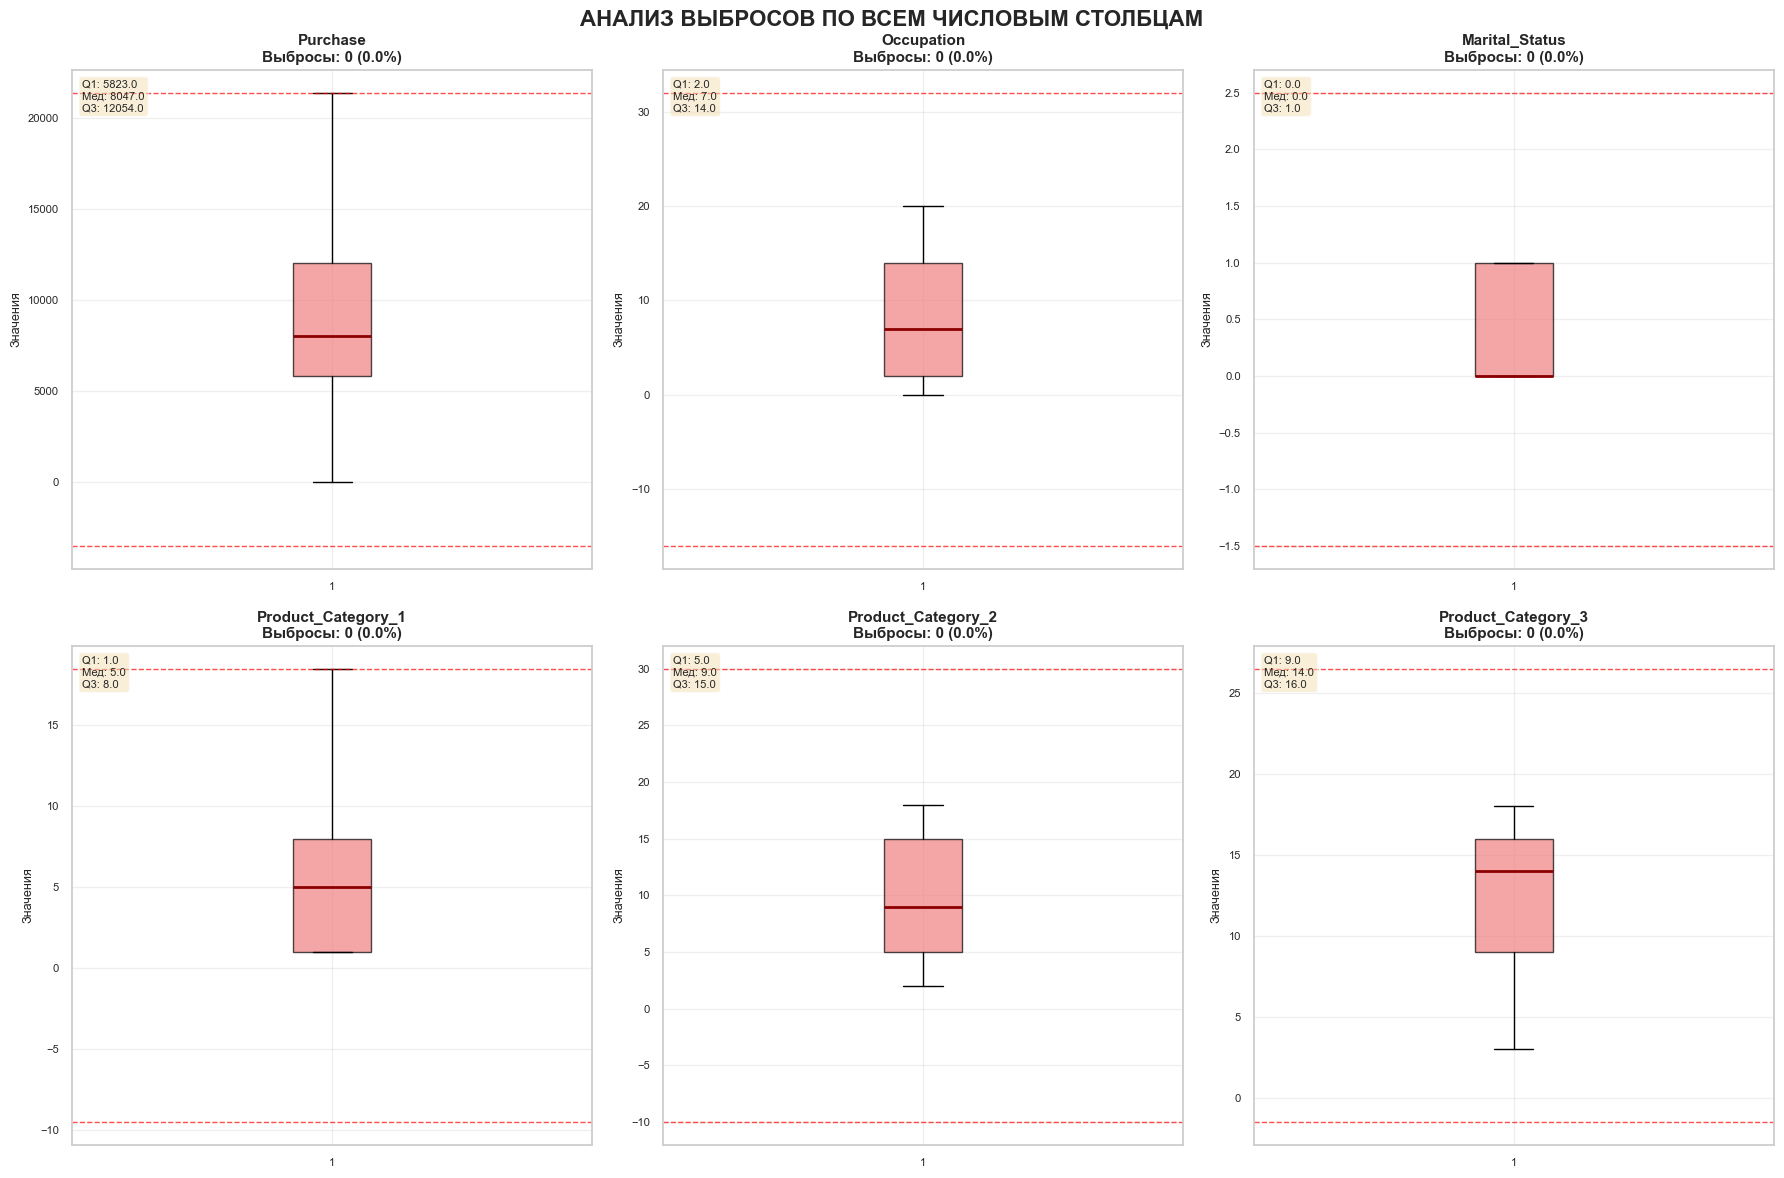


--------------------------------------------------------------------------------
СВОДНАЯ СТАТИСТИКА ВЫБРОСОВ
--------------------------------------------------------------------------------
           Колонка     Q1  Медиана      Q3    IQR  Выбросы  % Выбросов            Границы
          Purchase 5823.0   8047.0 12054.0 6231.0        0         0.0 [-3523.5, 21400.5]
        Occupation    2.0      7.0    14.0   12.0        0         0.0      [-16.0, 32.0]
    Marital_Status    0.0      0.0     1.0    1.0        0         0.0        [-1.5, 2.5]
Product_Category_1    1.0      5.0     8.0    7.0        0         0.0       [-9.5, 18.5]
Product_Category_2    5.0      9.0    15.0   10.0        0         0.0      [-10.0, 30.0]
Product_Category_3    9.0     14.0    16.0    7.0        0         0.0       [-1.5, 26.5]

--------------------------------------------------------------------------------
ДЕТАЛЬНЫЙ АНАЛИЗ ПО КОЛОНКАМ
--------------------------------------------------------------------

In [16]:
# Устранение выбросов и повторная проверка
helpers.anomaly_find(df)
tempDf = helpers.remove_outliers(df)
helpers.anomaly_find(tempDf)
tempDf = helpers.remove_outliers(tempDf)
helpers.anomaly_find(tempDf)


In [17]:
# Генерация новых признаков
feat_df = helpers.generate_features(df)
feat_df.filter(regex='Num_Product_Categories|Has_Prod_Cat_3|Purchase_per_Category|Is_High_Spender').head()


,Num_Product_Categories,Has_Prod_Cat_3,Purchase_per_Category,Is_High_Spender
0,1,0,8370.000000,0
1,3,1,5066.666667,1
2,1,0,1422.000000,0
3,2,0,528.500000,0
4,1,0,7969.000000,0


In [18]:
# Кодирование категориальных признаков (OHE)
ohe_df = helpers.one_hot_encode(df)
ohe_df.head()


,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_ID_P00000142,Product_ID_P00000242,Product_ID_P00000342,...,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,1000001,10,0,3,NaN,NaN,8370,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,1000001,10,0,1,6.0,14.0,15200,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,1000001,10,0,12,NaN,NaN,1422,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,1000001,10,0,12,14.0,NaN,1057,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,1000002,16,0,8,NaN,NaN,7969,0,0,0,...,0,1,0,0,1,0,0,0,0,1


In [19]:
# Бинаризация числовых признаков
bin_df = helpers.binarize_columns(df)
bin_df.filter(regex='_bin$').head()


,User_ID_bin,Occupation_bin,Product_Category_1_bin,Product_Category_2_bin,Product_Category_3_bin,Purchase_bin
0,0,1,0,0,0,1
1,0,1,0,0,0,1
2,0,1,1,0,0,0
3,0,1,1,1,0,0
4,0,1,1,0,0,0


In [20]:
# Стандартизация и нормализация
std_df = helpers.standardize(df)
mm_df = helpers.minmax_scale(df)

std_df.filter(regex='_std$').head(), mm_df.filter(regex='_mm$').head()


(   User_ID_std  Occupation_std  Marital_Status_std  Product_Category_1_std  \
 0    -1.752638        0.294863           -0.833017               -0.610808   
 1    -1.752638        0.294863           -0.833017               -1.118911   
 2    -1.752638        0.294863           -0.833017                1.675654   
 3    -1.752638        0.294863           -0.833017                1.675654   
 4    -1.752059        1.214733           -0.833017                0.659449   
 
    Product_Category_2_std  Product_Category_3_std  Purchase_std  
 0                     NaN                     NaN     -0.177973  
 1               -0.755384                0.322824      1.181755  
 2                     NaN                     NaN     -1.561192  
 3                0.817379                     NaN     -1.633857  
 4                     NaN                     NaN     -0.257804  ,
    User_ID_mm  Occupation_mm  Marital_Status_mm  Product_Category_1_mm  \
 0    0.000000            0.5                0